## Observations and Insights 

 * Mice treated with Capomulin and Ramicane have lower average tumor volume than other drug regimens.
 
 * There is a strong postive correlatiion between mouse weight and average tumor volume for the Capomulin regimen. when mouse      weight increases, the average tumor volume tend to increase as well. A relationship between two variables does not mean          the weight incease causes the average tumor volume to incease, we can only conclude both variables are related based upon on 
   postive strong correlation coefficent of =0.84 and the average tumor volume vs weight relation for the capomuline regime can
   be predicted using the following formula (y=0.95x+21.55)
 
 * For a specifice mouse, (mouse id="s185") treated with Capomulin, as a timepoint increases the average tumor volume tend to
   decrease.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview


In [23]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [24]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [25]:
combined_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Check the number of mice.
combined_total = len(combined_study_data["Mouse ID"].unique())
combined_total

249

In [29]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'], keep= False)]["Mouse ID"].unique()
duplicateRowsDF

array(['g989'], dtype=object)

In [32]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df=combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'], keep= False)]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data=combined_study_data[combined_study_data["Mouse ID"].isin(duplicateRowsDF)==False]
clean_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Check the number of mice in the clean DataFrame.
combined_count=len(clean_combined_data["Mouse ID"].unique())
combined_count



248

## Summary Statistics

In [35]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_tumor_mean=clean_combined_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
combined_tumor_median=clean_combined_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
combined_tumor_variance = clean_combined_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
combined_tumor_std = clean_combined_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
combined_tumor_sem = clean_combined_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


#Create df using a dictionary
summary_df = pd.DataFrame({"mean": combined_tumor_mean, "median": combined_tumor_median, "variance": combined_tumor_variance, "standard deviation": combined_tumor_std, "SEM":combined_tumor_sem})
summary_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data points')

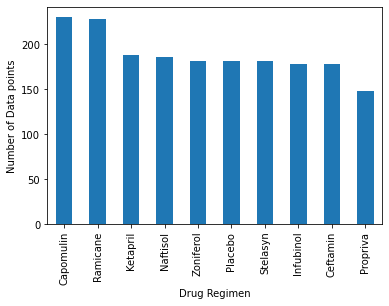

In [37]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
clean_data=clean_combined_data["Drug Regimen"].value_counts()
clean_data
## Note: this plot will be identical to the one that uses Pyplot
clean_data.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data points")

Text(0, 0.5, 'Number of Data points')

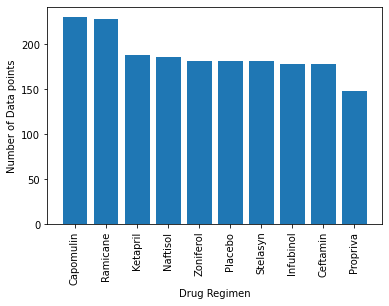

In [38]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
plt.bar(clean_data.index,clean_data.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data points")
##  Note: this plot will be identical to the one that uses Pandas

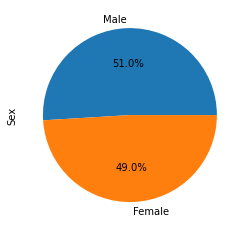

In [39]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
clean_distribution_data=clean_combined_data["Sex"].value_counts()
clean_distribution_data.plot(kind="pie",autopct="%1.1f%%")

## Note: this plot will be identical to the one that uses Pyplot

Text(0, 0.5, 'Sex')

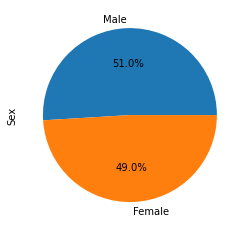

In [40]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
plt.pie(clean_distribution_data.values,labels=clean_distribution_data.index,autopct="%1.1f%%")
plt.ylabel("Sex")

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the drug regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
data_timepoint=clean_combined_data.groupby(["Mouse ID"]).max()["Timepoint"]
data_timepoint=data_timepoint.reset_index()
data_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df=pd.merge(data_timepoint[["Mouse ID","Timepoint"]],clean_combined_data,on=["Mouse ID","Timepoint"],how="left")
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [52]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
 Drug_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
 Tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 for x in Drug_list:
        
        # Locate the rows which contain mice on each drug and get the tumor volumes
        
        Drug_data=merge_df.loc[merge_df["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    
        Tumor_volume.append(Drug_data)
    
    # add subset
    
        quartiles = Drug_data.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        print(f"{x} potential outliers: {Drug_data.loc[(Drug_data < lower_bound) | (Drug_data > upper_bound)]}")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


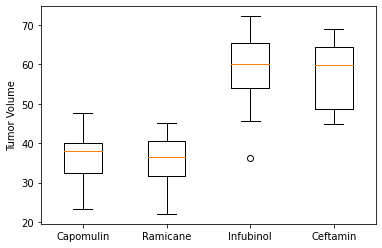

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(Tumor_volume,labels=Drug_list)
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

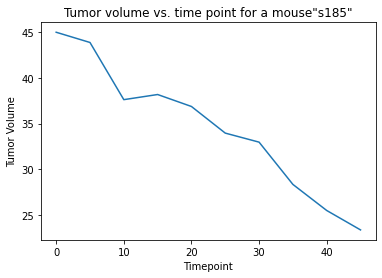

In [59]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
volume_df=clean_combined_data.loc[clean_combined_data["Drug Regimen"]=="Capomulin"]
s185_df=volume_df.loc[volume_df["Mouse ID"]=="s185"]
plt.plot(time_df["Timepoint"],s185_df["Tumor Volume (mm3)"])
plt.title('Tumor volume vs. time point for a mouse"s185"')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

In [56]:
# Data for a moutse treates with capomulin regimen
volume_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
volume_grouby_df=volume_df.groupby(["Mouse ID"]).mean()
volume_grouby_df
                       

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


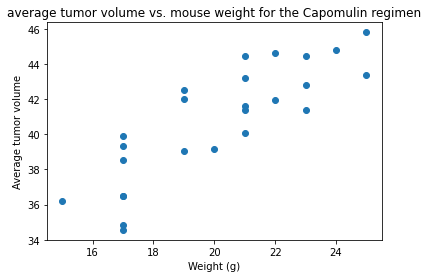

In [62]:
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
plt.scatter(volume_grouby_df["Weight (g)"],volume_grouby_df["Tumor Volume (mm3)"])
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor volume")
plt.show() 

## Correlation and Regression

In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
x_axis = volume_grouby_df["Weight (g)"]
y_axis = volume_grouby_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


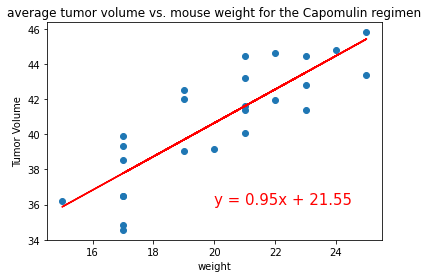

In [64]:
# linear regression model
x_axis = volume_grouby_df["Weight (g)"]
y_axis = volume_grouby_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel('weight')
plt.ylabel('Tumor Volume')
plt.show()